## PROJECT

List of NASA observatories with temperature data we are interested in:

In [1]:
observatories = {
  "Pisco Intl": "https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=PEM00084691&dt=1&ds=14",
  "New York Cntrl Pk Twr": "https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=USW00094728&dt=1&ds=14",
  "San Francisco Dwtn": "https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=USW00023272&dt=1&ds=14",
  "Reykjavik": "https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=IC000004030&dt=1&ds=14",
  "Sydney Airport Amo": "https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=ASN00066037&dt=1&ds=14",
  "Sao Paulo": "https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=BR00E3-0070&dt=1&ds=14",
  "Budapest Pestszentlorinc": "https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=HUM00012843&dt=1&ds=14",
  "Durban Intl": "https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=SFM00068588&dt=1&ds=14",
  "Tortosa observatorio Del Ebro": "https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=SP000009981&dt=1&ds=14",
  "Kansai International": "https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=JA000047772&dt=1&ds=14"
}

### Webscraping:

With the web link of the observatory, we're gonna get the url for the csv with the temperature data (to get the dataframe we're gonna work with), and the geolocation of the station (longitude and latitude).

In [2]:

import requests

# data from https://data.giss.nasa.gov/gistemp/station_data_v4_globe/

URL_NASA_T_Tort = "https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=SP000009981&dt=1&ds=14"

# if Selenium scraping: xpath = //*[@id="cpad"]/ul[2]/li[2]/a[2]

# Data per term:
# URL_NASA_T_Tort = "https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=SP000009981&dt=2&ds=14"


page_T_Tort = requests.get(URL_NASA_T_Tort)
page_T_Tort.raise_for_status

from bs4 import BeautifulSoup
soup_T_Tort = BeautifulSoup(page_T_Tort.text, "html.parser")

results_all = soup_T_Tort.find_all('a', target="_blank")

i=0
for l in results_all:
    if l.has_attr('href'):
        if i == 4:
            link = l['href']
    i = i+1

data_T_url = 'https://data.giss.nasa.gov' + link

print('the link with the temp data csv file is: ', data_T_url)

import pandas as pd

df_T = pd.read_csv(data_T_url, sep=',')
#df_SP = pd.read_csv(data_SP_url, skiprows=1, sep=',')

df_T


the link with the temp data csv file is:  https://data.giss.nasa.gov/tmp/gistemp/STATIONS/tmp_SP000009981_14_0_1/station.csv


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1905,8.68,8.99,13.92,16.19,17.65,21.86,25.99,24.98,20.74,15.80,12.27,7.09,8.87,15.92,24.28,16.27,16.33
1,1906,9.46,9.70,11.35,12.65,17.56,22.75,24.04,26.01,21.88,17.68,12.96,9.88,8.75,13.85,24.27,17.51,16.09
2,1907,7.92,8.57,11.67,14.48,17.11,22.05,23.31,25.53,22.05,16.64,13.07,11.61,8.79,14.42,23.63,17.25,16.02
3,1908,9.15,10.18,10.77,13.27,19.36,20.78,24.53,25.00,22.40,18.11,999.90,999.90,10.31,14.47,23.44,17.90,16.53
4,1909,7.89,7.83,11.23,15.35,17.84,20.07,23.06,25.30,20.93,19.21,11.09,10.92,7.89,14.81,22.81,17.08,15.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2019,10.67,12.00,15.24,16.09,19.48,23.86,28.24,27.44,24.29,20.37,14.31,12.69,11.59,16.94,26.51,19.66,18.67
115,2020,9.76,14.58,14.14,16.17,21.65,23.13,27.66,27.92,24.07,18.67,14.88,11.18,12.34,17.32,26.24,19.21,18.78
116,2021,10.40,13.17,14.07,14.94,19.98,24.60,26.72,26.63,23.91,19.01,13.33,11.97,11.58,16.33,25.98,18.75,18.16
117,2022,9.98,13.23,12.63,15.93,21.73,26.53,28.78,28.98,24.73,21.93,16.18,12.50,11.73,16.76,28.10,20.95,19.38


In [3]:

html_content = page_T_Tort.text

import re

# Define a regular expression pattern to extract latitude and longitude
pattern = r'\(([-+]?\d+\.\d+)([NS]),\s+([-+]?\d+\.\d+)([EW])\)'    # Thanx to chat GPT for this pattern :D

# Use re.search() to find the pattern in the HTML content
match = re.search(pattern, html_content)

if match:
    latitude = float(match.group(1)) if match.group(2) == 'N' else -float(match.group(1))
    longitude = float(match.group(3)) if match.group(4) == 'E' else -float(match.group(3))
    print(f"Latitude: {abs(latitude)} {match.group(2)}, Longitude: {abs(longitude)} {match.group(4)}")
else:
    print("Latitude and longitude not found.")

print(latitude)
print(longitude)


Latitude: 40.8206 N, Longitude: 0.4914 E
40.8206
0.4914


In [4]:
# This is to work in local, with the staion data csv file in the same folder as this notebook
'''
import pandas as pd

df_T = pd.read_csv('station.csv', sep=',')

df_T
'''

"\nimport pandas as pd\n\ndf_T = pd.read_csv('station.csv', sep=',')\n\ndf_T\n"

### Preprocessing

In [5]:
df_T.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'D-J-F', 'M-A-M', 'J-J-A', 'S-O-N', 'metANN'],
      dtype='object')

Since we don't need the Temp data per term or the annual average, therefore we're dropping those columns:

In [6]:
df_T = df_T.drop(['D-J-F', 'M-A-M', 'J-J-A', 'S-O-N', 'metANN'], axis=1)
df_T

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1905,8.68,8.99,13.92,16.19,17.65,21.86,25.99,24.98,20.74,15.80,12.27,7.09
1,1906,9.46,9.70,11.35,12.65,17.56,22.75,24.04,26.01,21.88,17.68,12.96,9.88
2,1907,7.92,8.57,11.67,14.48,17.11,22.05,23.31,25.53,22.05,16.64,13.07,11.61
3,1908,9.15,10.18,10.77,13.27,19.36,20.78,24.53,25.00,22.40,18.11,999.90,999.90
4,1909,7.89,7.83,11.23,15.35,17.84,20.07,23.06,25.30,20.93,19.21,11.09,10.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2019,10.67,12.00,15.24,16.09,19.48,23.86,28.24,27.44,24.29,20.37,14.31,12.69
115,2020,9.76,14.58,14.14,16.17,21.65,23.13,27.66,27.92,24.07,18.67,14.88,11.18
116,2021,10.40,13.17,14.07,14.94,19.98,24.60,26.72,26.63,23.91,19.01,13.33,11.97
117,2022,9.98,13.23,12.63,15.93,21.73,26.53,28.78,28.98,24.73,21.93,16.18,12.50


In [7]:
df_T.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')

In [8]:
df_T.isna().sum()

YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
dtype: int64

In [9]:
for col in df_T.columns:
    print(col, ':', (df_T[col] == 999.90).sum())

YEAR : 0
JAN : 2
FEB : 4
MAR : 3
APR : 4
MAY : 4
JUN : 4
JUL : 4
AUG : 4
SEP : 4
OCT : 4
NOV : 5
DEC : 5


When we take a closer look at the data, we notice that when some temperature is missing, the cell is not left empty, but it contains the value 999.90. We'll replace that number with nan and proceed further with the preprocessing.

In [10]:
import numpy as np

df_T = df_T.replace({ 999.90: np.nan })

df_T.isna().sum()


YEAR    0
JAN     2
FEB     4
MAR     3
APR     4
MAY     4
JUN     4
JUL     4
AUG     4
SEP     4
OCT     4
NOV     5
DEC     5
dtype: int64

In [11]:
df_T[-1:]

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
118,2023,10.89,10.1,16.05,18.7,21.14,25.3,28.95,28.95,NaN,NaN,NaN,NaN


In [12]:
df_T[:1]

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1905,8.68,8.99,13.92,16.19,17.65,21.86,25.99,24.98,20.74,15.8,12.27,7.09


We got ourselves a dataframe with Year on the vertical and Month on the horizontal, but what we really want is a timeseries, with the dates as index and one column with the Temperature data. We'll start obtaining the dates that will end up in the index column. For that we use an indented for loop.

In [13]:
from datetime import datetime
dates = []
for i in range(len(df_T)):
    for j in range(len(df_T.columns)-1):
        dates.append(datetime(df_T.loc[i,'YEAR'],j+1,1))
    #dates.append(datetime(df_T.loc[i,'YEAR'],1,1))
    #dates.append(datetime(df_T.loc[i,'YEAR'],2,1))
    #dates.append(datetime(df_T.loc[i,'YEAR'],3,1))
    #dates.append(datetime(df_T.loc[i,'YEAR'],4,1))
    #dates.append(datetime(df_T.loc[i,'YEAR'],5,1))
    #dates.append(datetime(df_T.loc[i,'YEAR'],6,1))
    #dates.append(datetime(df_T.loc[i,'YEAR'],7,1))
    #dates.append(datetime(df_T.loc[i,'YEAR'],8,1))
    #dates.append(datetime(df_T.loc[i,'YEAR'],9,1))
    #dates.append(datetime(df_T.loc[i,'YEAR'],10,1))
    #dates.append(datetime(df_T.loc[i,'YEAR'],11,1))
    #dates.append(datetime(df_T.loc[i,'YEAR'],12,1))
dates


[datetime.datetime(1905, 1, 1, 0, 0),
 datetime.datetime(1905, 2, 1, 0, 0),
 datetime.datetime(1905, 3, 1, 0, 0),
 datetime.datetime(1905, 4, 1, 0, 0),
 datetime.datetime(1905, 5, 1, 0, 0),
 datetime.datetime(1905, 6, 1, 0, 0),
 datetime.datetime(1905, 7, 1, 0, 0),
 datetime.datetime(1905, 8, 1, 0, 0),
 datetime.datetime(1905, 9, 1, 0, 0),
 datetime.datetime(1905, 10, 1, 0, 0),
 datetime.datetime(1905, 11, 1, 0, 0),
 datetime.datetime(1905, 12, 1, 0, 0),
 datetime.datetime(1906, 1, 1, 0, 0),
 datetime.datetime(1906, 2, 1, 0, 0),
 datetime.datetime(1906, 3, 1, 0, 0),
 datetime.datetime(1906, 4, 1, 0, 0),
 datetime.datetime(1906, 5, 1, 0, 0),
 datetime.datetime(1906, 6, 1, 0, 0),
 datetime.datetime(1906, 7, 1, 0, 0),
 datetime.datetime(1906, 8, 1, 0, 0),
 datetime.datetime(1906, 9, 1, 0, 0),
 datetime.datetime(1906, 10, 1, 0, 0),
 datetime.datetime(1906, 11, 1, 0, 0),
 datetime.datetime(1906, 12, 1, 0, 0),
 datetime.datetime(1907, 1, 1, 0, 0),
 datetime.datetime(1907, 2, 1, 0, 0),
 datet

Now we create a new dataframe with the dates and ravelling with them the corresponding Temperature value. Later on we set the date column as index.

In [14]:
new_df_T = pd.DataFrame({'date': dates, 'TEMP_C': df_T[df_T.columns.drop('YEAR')].values.ravel()})

new_df_T

,date,TEMP_C
0,1905-01-01,8.68
1,1905-02-01,8.99
2,1905-03-01,13.92
3,1905-04-01,16.19
4,1905-05-01,17.65
...,...,...
1423,2023-08-01,28.95
1424,2023-09-01,NaN
1425,2023-10-01,NaN
1426,2023-11-01,NaN


In [15]:
new_df_T = new_df_T.set_index('date')
new_df_T

,TEMP_C
date,
1905-01-01,8.68
1905-02-01,8.99
1905-03-01,13.92
1905-04-01,16.19
1905-05-01,17.65
...,...
2023-08-01,28.95
2023-09-01,NaN
2023-10-01,NaN


In [16]:
new_df_T.isna().sum()

TEMP_C    47
dtype: int64

Here we'll use slicing to get rid of NA's at the beginning and at the end of the dataframe. Later on we'll input the missing data with data from 12 months before (since there is a yearly pattern).

In [17]:
new_df_T = new_df_T[new_df_T.first_valid_index():new_df_T.last_valid_index()]   # get rid of na's at start and end of df
new_df_T

,TEMP_C
date,
1905-01-01,8.68
1905-02-01,8.99
1905-03-01,13.92
1905-04-01,16.19
1905-05-01,17.65
...,...
2023-04-01,18.70
2023-05-01,21.14
2023-06-01,25.30


In [18]:
new_df_T.isna().sum()

TEMP_C    43
dtype: int64

In [19]:
# Let's get rid of not needed variables:
del df_T
del dates

import gc
# Triggering garbage collection
gc.collect()

0

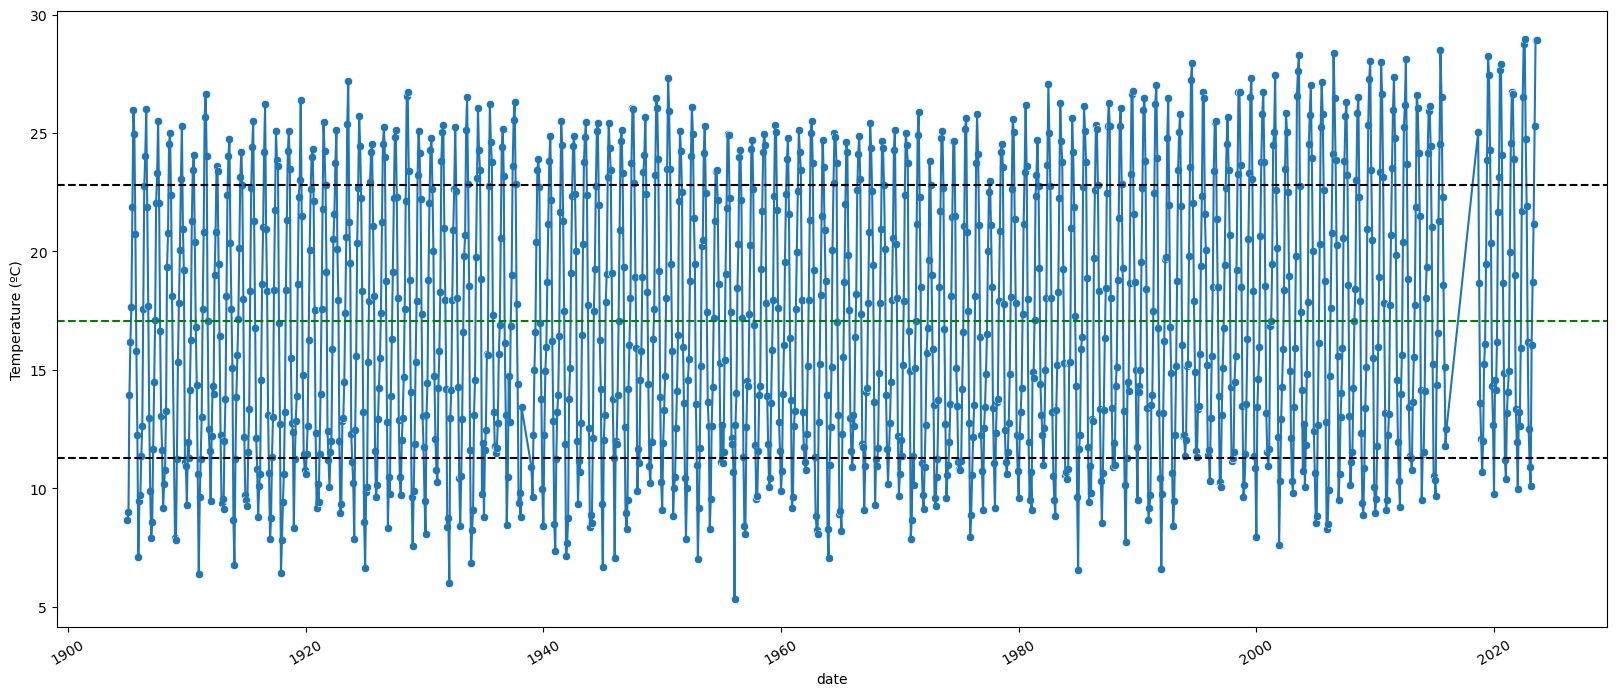

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))

sns.lineplot(x="date", y="TEMP_C", data=new_df_T)

sns.scatterplot(x="date", y="TEMP_C", data=new_df_T)
plt.axhline(y = new_df_T.TEMP_C.mean(), color = 'g', linestyle = '--')
plt.axhline(y = new_df_T.TEMP_C.mean() + new_df_T.TEMP_C.std(), color = 'black', linestyle = '--')
plt.axhline(y = new_df_T.TEMP_C.mean() - new_df_T.TEMP_C.std(), color = 'black', linestyle = '--')

plt.ylabel('Temperature (ºC)')
plt.xticks(rotation=30)
plt.show()

In [21]:
while new_df_T.isnull().values.any():  # while theres na in the entire dataframe...
    new_df_T['TEMP_C'] = new_df_T['TEMP_C'].fillna(new_df_T['TEMP_C'].shift(12))   # ...fill na with data from 12 months before

new_df_T[new_df_T.isna().any(axis=1)]

#https://sparkbyexamples.com/pandas/pandas-check-if-any-value-is-nan-in-a-dataframe/

C:\Users\WotanJr\AppData\Local\Temp\ipykernel_5264\645804155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_T['TEMP_C'] = new_df_T['TEMP_C'].fillna(new_df_T['TEMP_C'].shift(12))   # ...fill na with data from 12 months before


,TEMP_C
date,


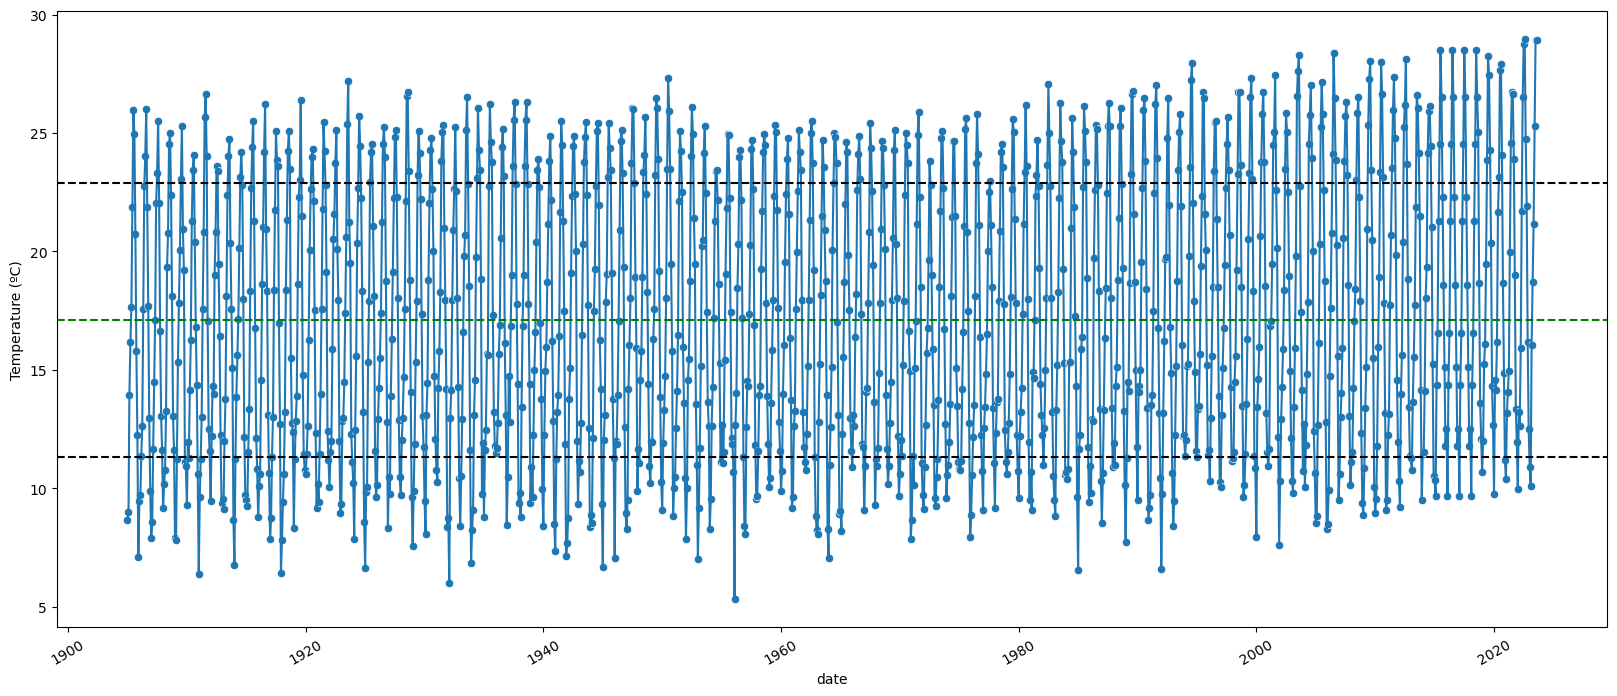

In [22]:

plt.figure(figsize=(20,8))

sns.lineplot(x="date", y="TEMP_C", data=new_df_T)

sns.scatterplot(x="date", y="TEMP_C", data=new_df_T)
plt.axhline(y = new_df_T.TEMP_C.mean(), color = 'g', linestyle = '--')
plt.axhline(y = new_df_T.TEMP_C.mean() + new_df_T.TEMP_C.std(), color = 'black', linestyle = '--')
plt.axhline(y = new_df_T.TEMP_C.mean() - new_df_T.TEMP_C.std(), color = 'black', linestyle = '--')

plt.ylabel('Temperature (ºC)')
plt.xticks(rotation=30)
plt.show()

Also we will calculate the temperature data in Kelvin for the ML part. Celsius will be used for plotting.

In [23]:
new_df_T['TEMP_K'] = new_df_T['TEMP_C'] + 273.15
new_df_T

C:\Users\WotanJr\AppData\Local\Temp\ipykernel_5264\2413831056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_T['TEMP_K'] = new_df_T['TEMP_C'] + 273.15


,TEMP_C,TEMP_K
date,,
1905-01-01,8.68,281.83
1905-02-01,8.99,282.14
1905-03-01,13.92,287.07
1905-04-01,16.19,289.34
1905-05-01,17.65,290.80
...,...,...
2023-04-01,18.70,291.85
2023-05-01,21.14,294.29
2023-06-01,25.30,298.45


<AxesSubplot:xlabel='TEMP_C'>

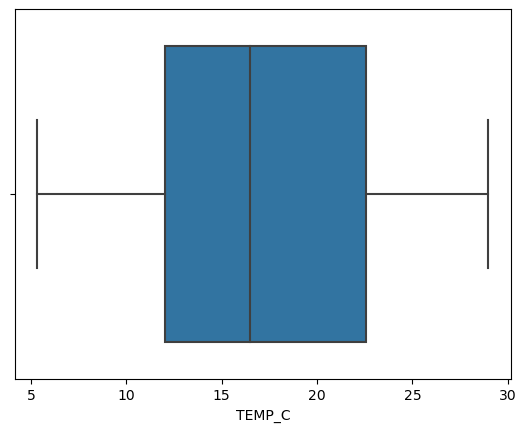

In [24]:
sns.boxplot(x='TEMP_C', data=new_df_T)

C:\Users\WotanJr\AppData\Local\Temp\ipykernel_5264\3026563200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_T['year'] = [d.year for d in new_df_T.index]
C:\Users\WotanJr\AppData\Local\Temp\ipykernel_5264\3026563200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_T['month_n'] = [d.strftime('%m') for d in new_df_T.index]
C:\Users\WotanJr\AppData\Local\Temp\ipykernel_5264\3026563200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

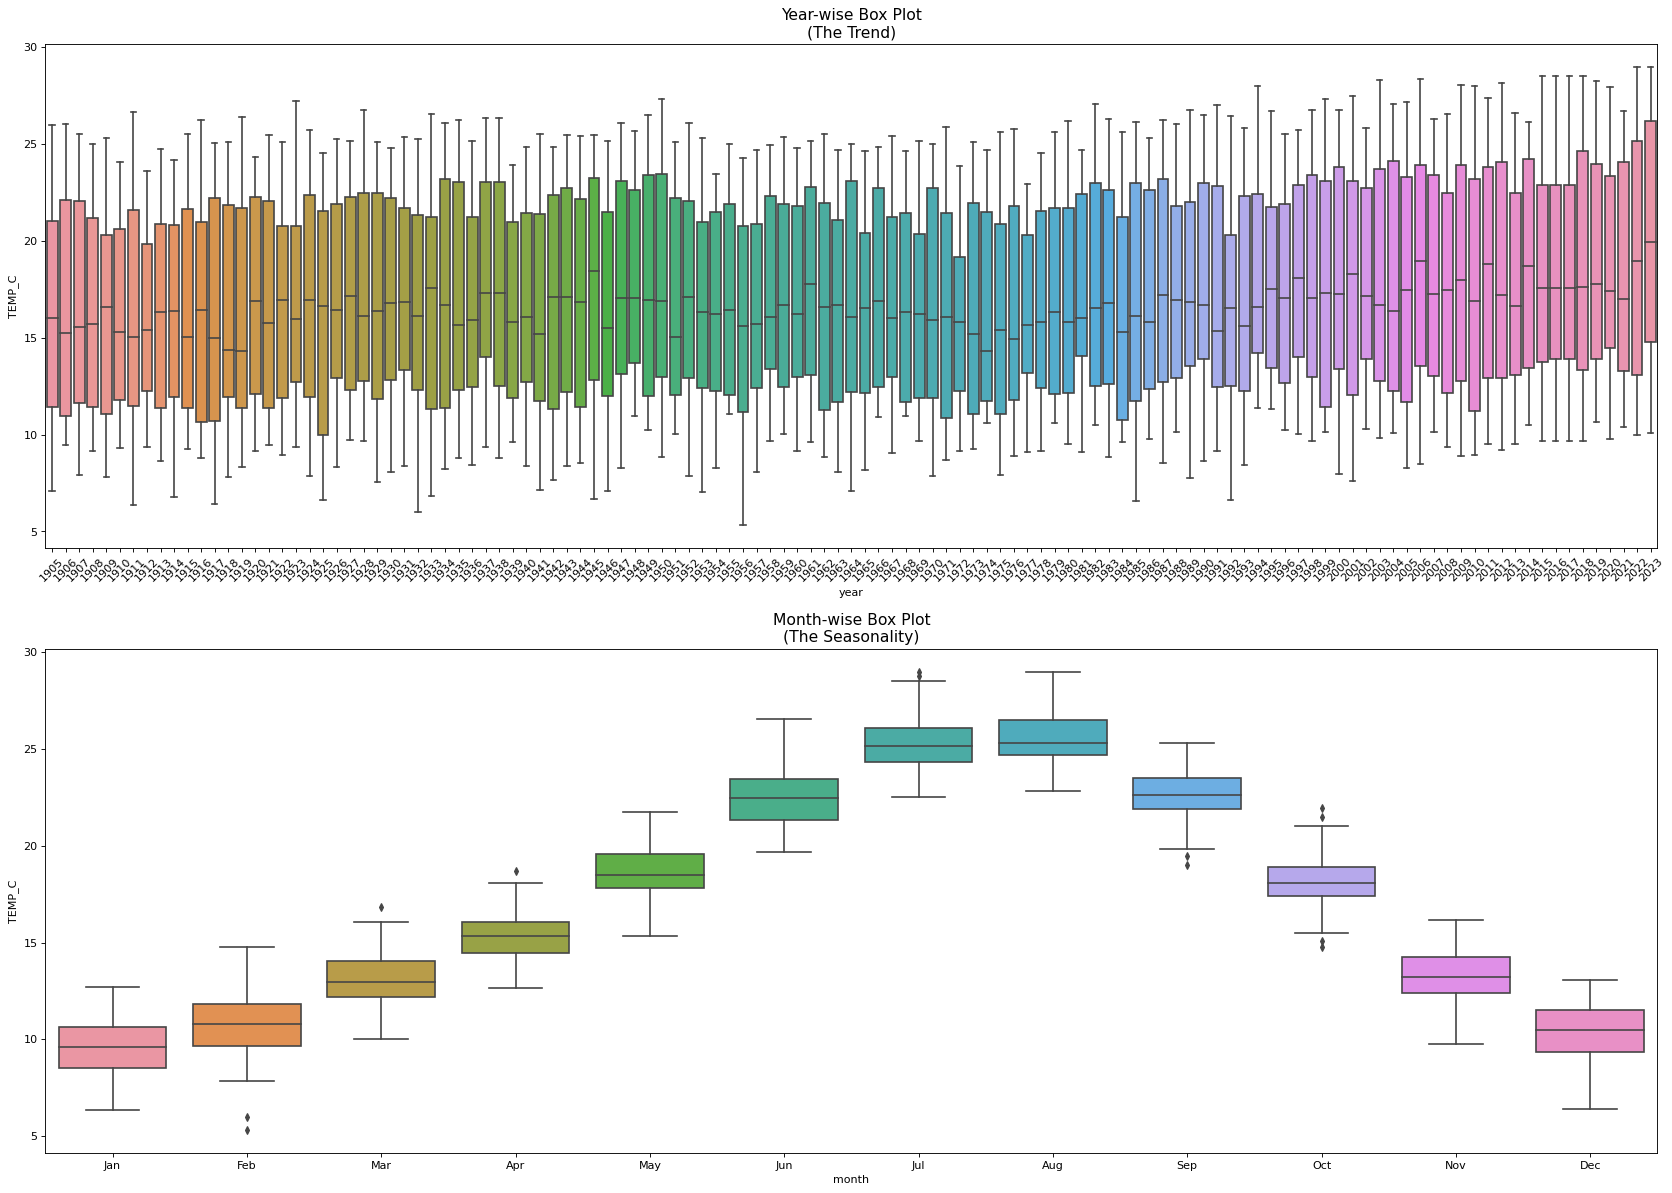

In [25]:
# Prepare data
new_df_T['year'] = [d.year for d in new_df_T.index]
new_df_T['month_n'] = [d.strftime('%m') for d in new_df_T.index]
new_df_T['month'] = [d.strftime('%b') for d in new_df_T.index]
years = new_df_T['year'].unique()

# Draw Plot
fig, axes = plt.subplots(2, 1, figsize=(26,18), dpi= 80)
sns.boxplot(x='year', y='TEMP_C', data=new_df_T, ax=axes[0])
sns.boxplot(x='month', y='TEMP_C', data=new_df_T)

# Set Title
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=45)
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=14);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=14)
plt.show()


In [26]:
new_df_T

,TEMP_C,TEMP_K,year,month_n,month
date,,,,,
1905-01-01,8.68,281.83,1905,01,Jan
1905-02-01,8.99,282.14,1905,02,Feb
1905-03-01,13.92,287.07,1905,03,Mar
1905-04-01,16.19,289.34,1905,04,Apr
1905-05-01,17.65,290.80,1905,05,May
...,...,...,...,...,...
2023-04-01,18.70,291.85,2023,04,Apr
2023-05-01,21.14,294.29,2023,05,May
2023-06-01,25.30,298.45,2023,06,Jun


In [27]:
new_df_T = new_df_T.drop(['month'], axis=1)
new_df_T

,TEMP_C,TEMP_K,year,month_n
date,,,,
1905-01-01,8.68,281.83,1905,01
1905-02-01,8.99,282.14,1905,02
1905-03-01,13.92,287.07,1905,03
1905-04-01,16.19,289.34,1905,04
1905-05-01,17.65,290.80,1905,05
...,...,...,...,...
2023-04-01,18.70,291.85,2023,04
2023-05-01,21.14,294.29,2023,05
2023-06-01,25.30,298.45,2023,06


In [28]:
'''
Per veure quines files tenen na's

new_df_T[new_df_T.isna().any(axis=1)]
new_df_T.query('TEMP != TEMP')

'''

"\nPer veure quines files tenen na's\n\nnew_df_T[new_df_T.isna().any(axis=1)]\nnew_df_T.query('TEMP != TEMP')\n\n"

### STL decomposition

In this decomposition of the data in trend, seasonality and noise, we can tell that the seasonality is obvius and the trend becomes upwards, especially since the mid seventies on.

<Figure size 1800x800 with 0 Axes>

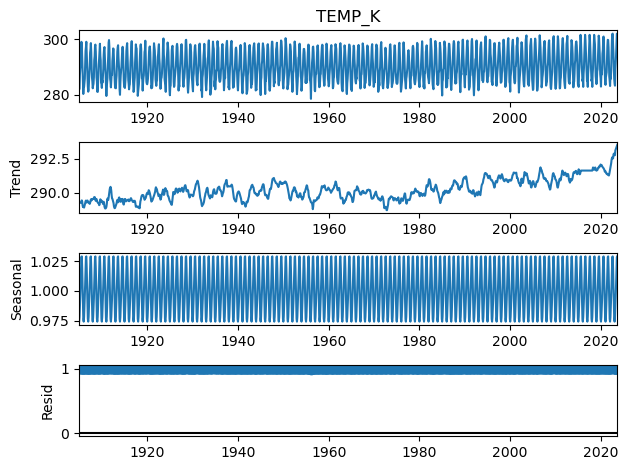

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(18,8))
decompose_result = seasonal_decompose(new_df_T['TEMP_K'], model='multiplicative', period=12, extrapolate_trend='freq')
decompose_result.plot()
plt.show()

The Augmented Dickey Fuller test (ADF Test) will tell us statistically wether a time series is stationary or not. It shows that it's non stationary.

In [30]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
result = adfuller(new_df_T['TEMP_K'].values, autolag='AIC')
#Extracting the values from the results:

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.581276
p-value: 0.492992
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


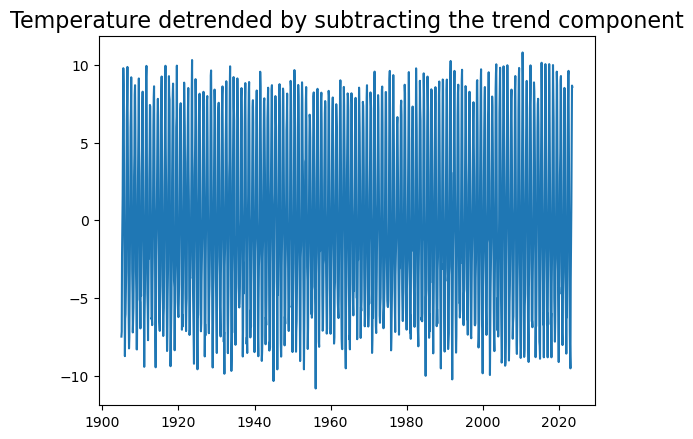

In [31]:
detrended = new_df_T['TEMP_K'].values - decompose_result.trend
plt.plot(detrended)
plt.title('Temperature detrended by subtracting the trend component', fontsize=16)
plt.show()

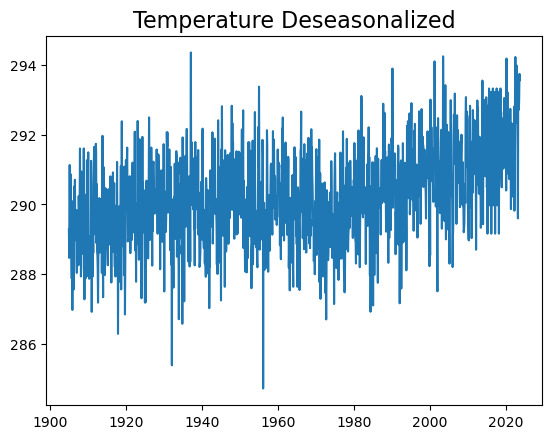

In [32]:
# Deseasonalize
deseasonalized = new_df_T['TEMP_K'].values / decompose_result.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Temperature Deseasonalized', fontsize=16)
plt.plot()
plt.show()

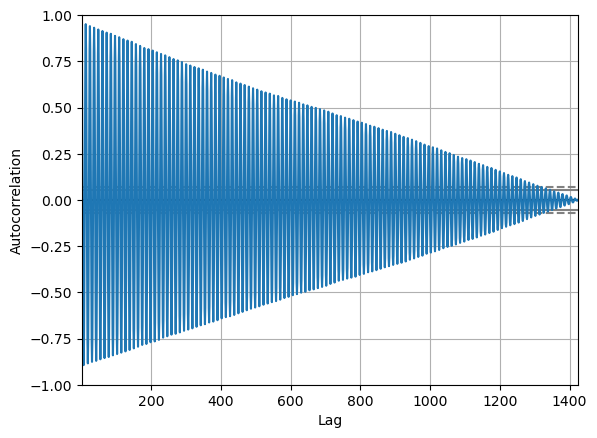

In [33]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(new_df_T['TEMP_K'])

plt.show()

In [34]:
#!pip install pmdarima

In [35]:
import pmdarima

pmdarima.arima.CHTest(m=12).estimate_seasonal_differencing_term(new_df_T['TEMP_K'])

# https://freakonometrics.hypotheses.org/tag/canova-hansen
# where the ouput: “1” means that there is a seasonal unit root and “0” that there is no seasonal unit root.

1

In [36]:
pmdarima.arima.nsdiffs(new_df_T['TEMP_K'], m=12, test="ch", max_D=3)  # same thing than previous cell

1

### autocorrelation function (ACF) and partial autocorrelation function (PACF)

The ACF can be defined as the correlation between a time series and itself with n lags. So ACF(1) is the correlation between the time series and a one-step lagged version of itself. An ACF(2) is the correlation between the time series and a two-step lagged version of itself and so on.

On the other hand, the PACF is the correlation between a time series and a lagged version of itself after subtracting the effect of correlation at smaller lags. So it can be considered as the correlation at a particular lag.

C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


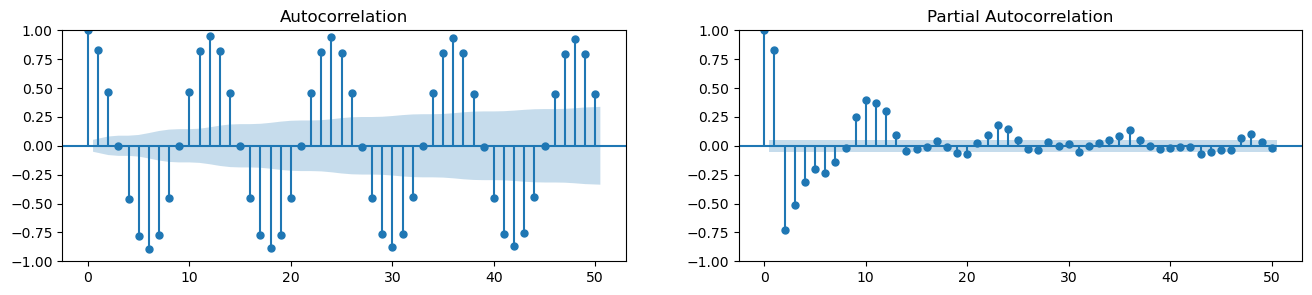

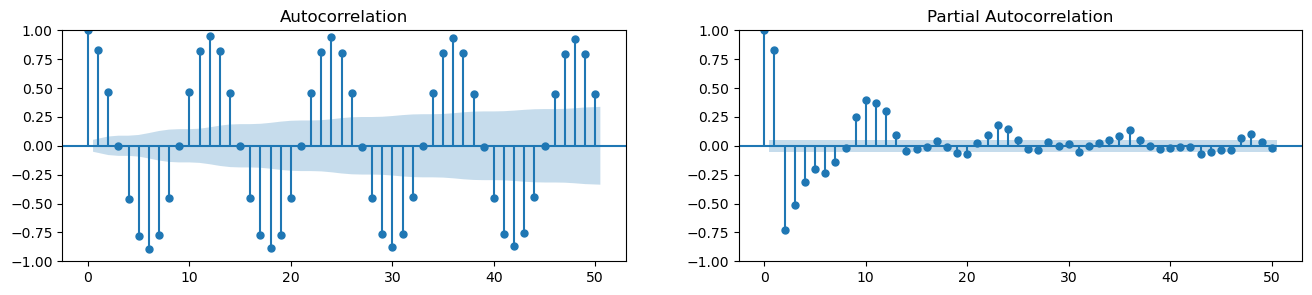

In [37]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
acf_50 = acf(new_df_T.TEMP_K, nlags=50)
pacf_50 = pacf(new_df_T.TEMP_K, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(new_df_T.TEMP_K.tolist(), lags=50, ax=axes[0])
plot_pacf(new_df_T.TEMP_K.tolist(), lags=50, ax=axes[1])

Lag plots: A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

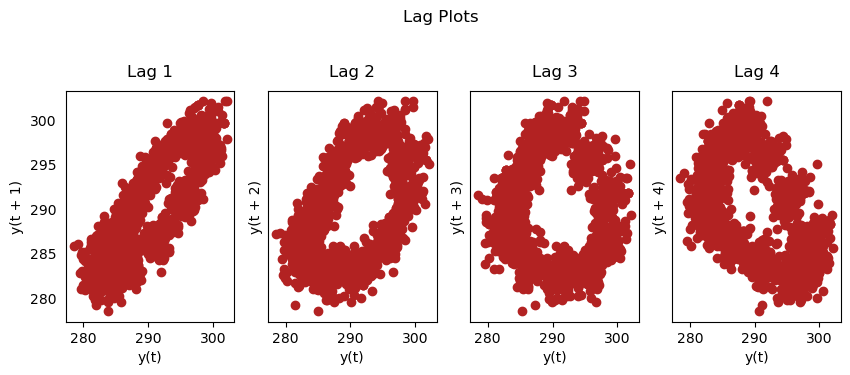

In [38]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(new_df_T.TEMP_K, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots', y=1.15)

plt.show()

Entropy. How difficult it's gonna be to forecast future data? Here we compare the approximate entropy of our case compared to cases with small and big randomization events. It looks like our entropy is a bit high, therefore more difficulty to predict.

In [39]:
# https://en.wikipedia.org/wiki/Approximate_entropy
'''
The more regular and repeatable patterns a time series has, the easier it is to forecast.
The ‘Approximate Entropy’ can be used to quantify the regularity and unpredictability of fluctuations in a time series.
The higher the approximate entropy, the more difficult it is to forecast it.
'''

rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(new_df_T.TEMP_K, m=2, r=0.2*np.std(new_df_T.TEMP_K)))
print(ApEn(rand_small, m=2, r=0.2*np.std(rand_small))) #  aprox. 0.143
print(ApEn(rand_big, m=2, r=0.2*np.std(rand_big)))     #  aprox. 0.716

0.9488746441859814
0.15028563265735695
0.6988188032665885


In [40]:
# https://en.wikipedia.org/wiki/Sample_entropy

def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(new_df_T.TEMP_K, m=2, r=0.2*np.std(new_df_T.TEMP_K)))
print(SampEn(rand_small, m=2, r=0.2*np.std(rand_small)))  # aprox. 1.79
print(SampEn(rand_big, m=2, r=0.2*np.std(rand_big)))      # aprox. 2.42

0.9223096810964668
1.252762968495368
2.91235066461494


### Time Series smoothing
Since the data provided is a monthly average, there's no need to make a big smoothing of it. We'll go for the 3 months moving average.

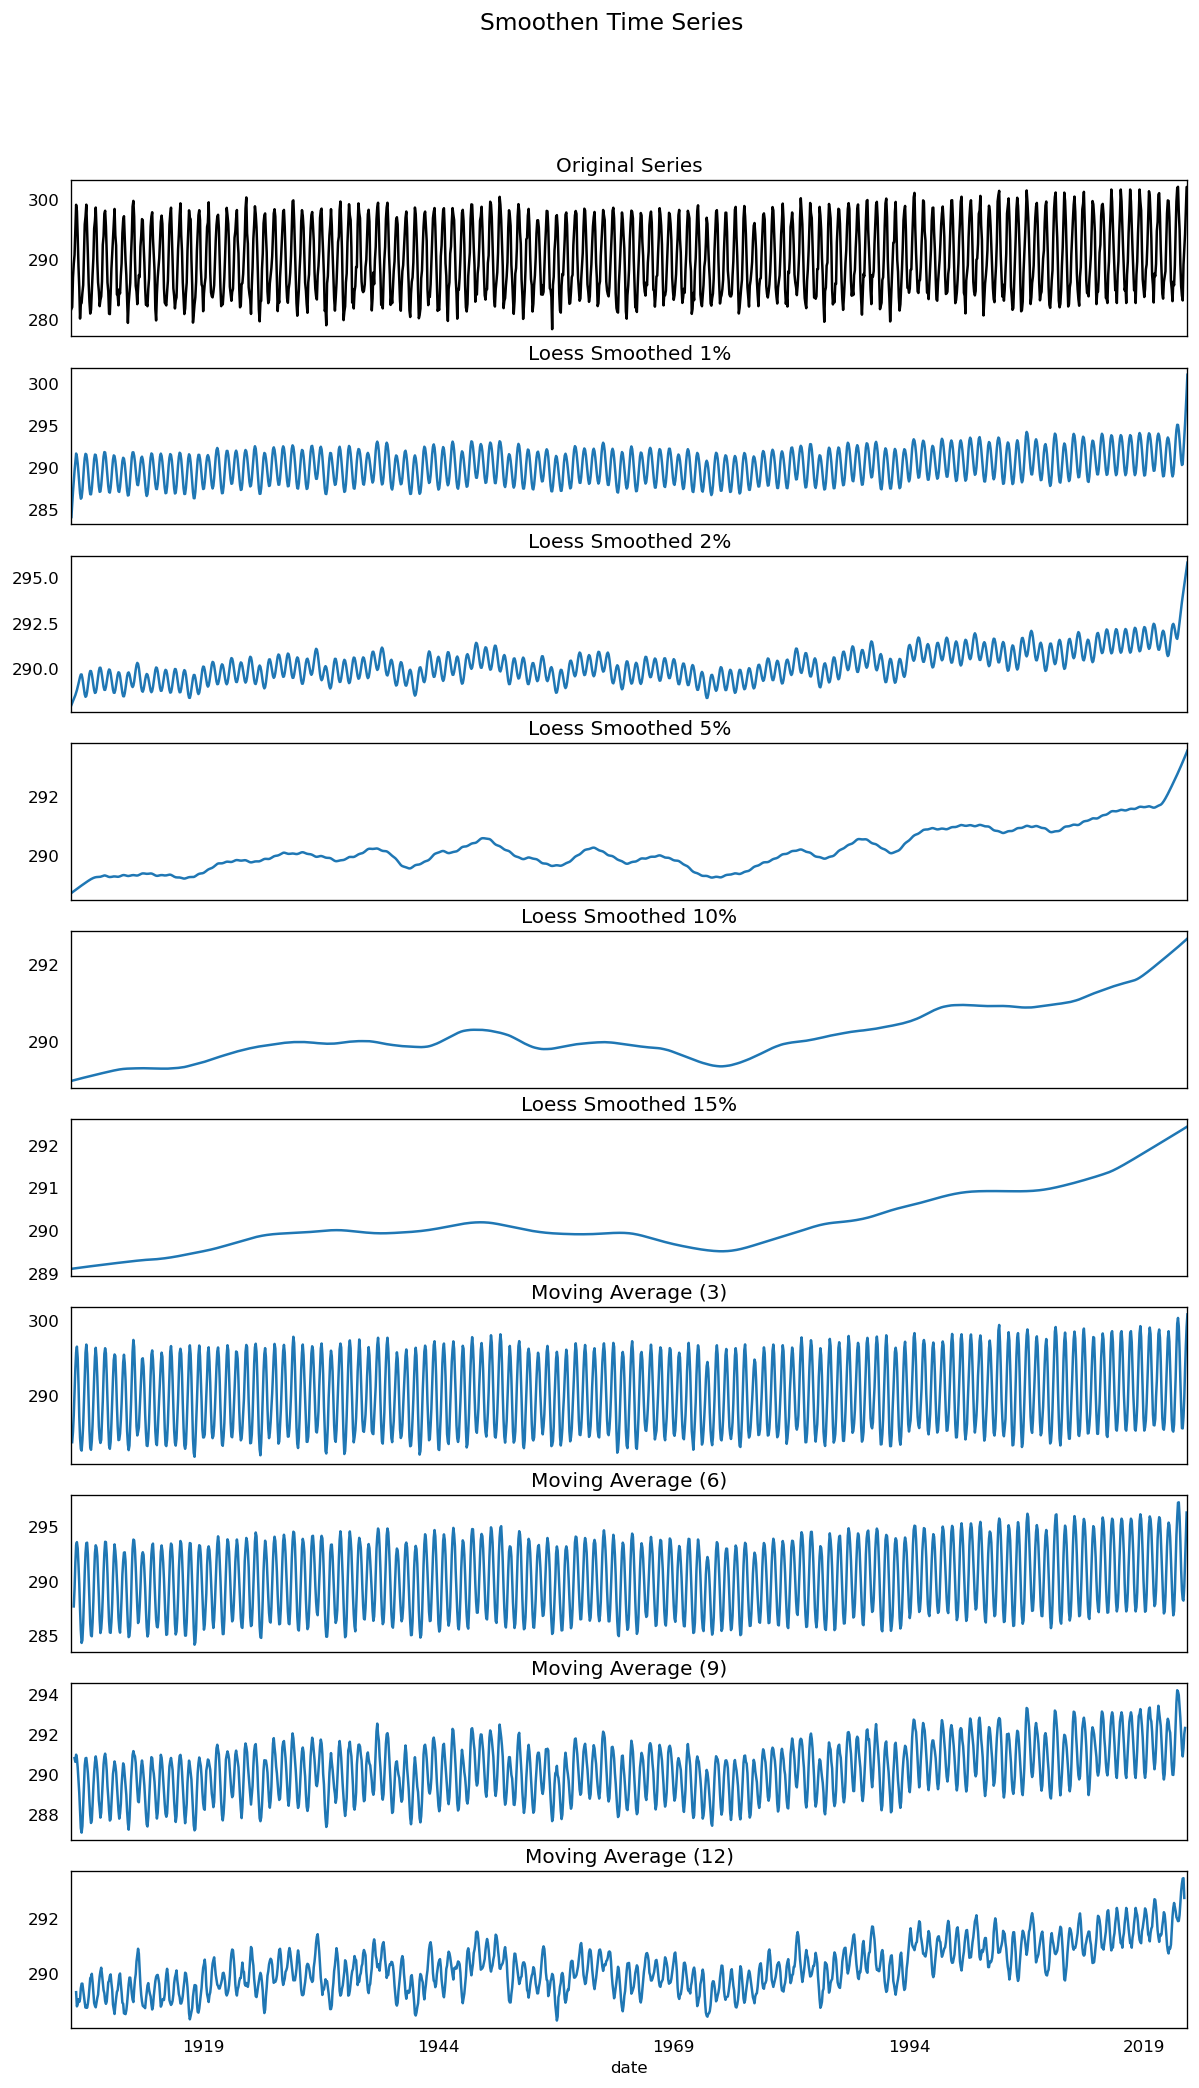

In [41]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# 1. Moving Average
df_ma_3 = new_df_T.TEMP_K.rolling(3, center=True, closed='both').mean()
df_ma_6 = new_df_T.TEMP_K.rolling(6, center=True, closed='both').mean()
df_ma_9 = new_df_T.TEMP_K.rolling(9, center=True, closed='both').mean()
df_ma_12 = new_df_T.TEMP_K.rolling(12, center=True, closed='both').mean()  # you get rid of seasonality

# 2. Loess Smoothing (5% and 15%)
df_loess_1 = pd.DataFrame(lowess(new_df_T.TEMP_K, np.arange(len(new_df_T.TEMP_K)), frac=0.01)[:, 1], index=new_df_T.index, columns=['value'])
df_loess_2 = pd.DataFrame(lowess(new_df_T.TEMP_K, np.arange(len(new_df_T.TEMP_K)), frac=0.02)[:, 1], index=new_df_T.index, columns=['value'])
df_loess_5 = pd.DataFrame(lowess(new_df_T.TEMP_K, np.arange(len(new_df_T.TEMP_K)), frac=0.05)[:, 1], index=new_df_T.index, columns=['value'])
df_loess_10 = pd.DataFrame(lowess(new_df_T.TEMP_K, np.arange(len(new_df_T.TEMP_K)), frac=0.1)[:, 1], index=new_df_T.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(new_df_T.TEMP_K, np.arange(len(new_df_T.TEMP_K)), frac=0.15)[:, 1], index=new_df_T.index, columns=['value'])

# Plot
fig, axes = plt.subplots(10,1, figsize=(12, 20), sharex=True, dpi=120)
new_df_T.TEMP_K.plot(ax=axes[0], color='k', title='Original Series')
df_loess_1['value'].plot(ax=axes[1], title='Loess Smoothed 1%')
df_loess_2['value'].plot(ax=axes[2], title='Loess Smoothed 2%')
df_loess_5['value'].plot(ax=axes[3], title='Loess Smoothed 5%')
df_loess_10['value'].plot(ax=axes[4], title='Loess Smoothed 10%')
df_loess_15['value'].plot(ax=axes[5], title='Loess Smoothed 15%')
df_ma_3.plot(ax=axes[6], title='Moving Average (3)')
df_ma_6.plot(ax=axes[7], title='Moving Average (6)')
df_ma_9.plot(ax=axes[8], title='Moving Average (9)')
df_ma_12.plot(ax=axes[9], title='Moving Average (12)')   # it remains the trend and the noise

fig.suptitle('Smoothen Time Series', y=0.95, fontsize=14)
plt.show()

In [42]:
df_ma_3

date
1905-01-01           NaN
1905-02-01    283.680000
1905-03-01    285.095000
1905-04-01    287.337500
1905-05-01    290.555000
                 ...    
2023-04-01    289.647500
2023-05-01    293.447500
2023-06-01    296.672500
2023-07-01    299.235000
2023-08-01    300.883333
Name: TEMP_K, Length: 1424, dtype: float64

In [43]:
df_ma_3.dropna(inplace=True)    # rolling window deixa na's

In [44]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
result = adfuller(df_ma_3, autolag='AIC')
#Extracting the values from the results:

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.374820
p-value: 0.594286
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


In [45]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [46]:
print(len(df_ma_3.values))
df_ma_3

1423


date
1905-02-01    283.680000
1905-03-01    285.095000
1905-04-01    287.337500
1905-05-01    290.555000
1905-06-01    293.572500
                 ...    
2023-04-01    289.647500
2023-05-01    293.447500
2023-06-01    296.672500
2023-07-01    299.235000
2023-08-01    300.883333
Name: TEMP_K, Length: 1423, dtype: float64

### Modelling

#### Time series splitting

Split number 1:
Observations: 475
Training Observations: 238
Testing Observations: 237
Split number 2:
Observations: 712
Training Observations: 475
Testing Observations: 237
Split number 3:
Observations: 949
Training Observations: 712
Testing Observations: 237
Split number 4:
Observations: 1186
Training Observations: 949
Testing Observations: 237
Split number 5:
Observations: 1423
Training Observations: 1186
Testing Observations: 237


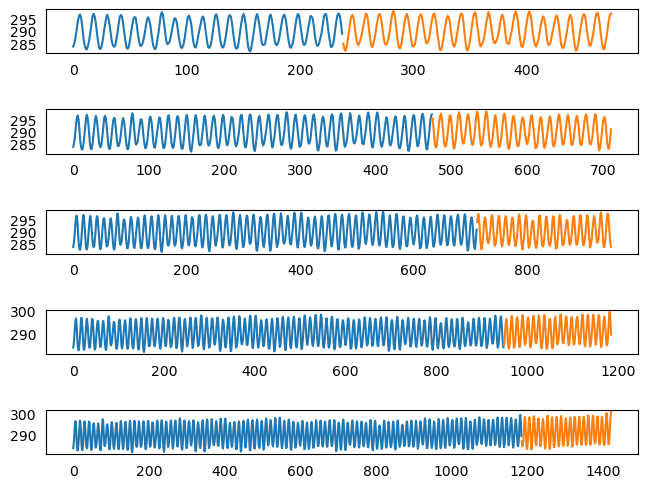

In [47]:
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot

# If you wanna make the length of the dataset multiple of number of splits plus 1, uncomment the next 4 lines
'''
n_splits=5
cut=len(df_ma_3.values)%(n_splits+1)
X=df_ma_3.values[cut:]     # get rid of oldest data
tscv = TimeSeriesSplit(n_splits)
'''

X=df_ma_3.values
tscv = TimeSeriesSplit(n_splits=5)
pyplot.figure(1)
index=1
for train_index, test_index in tscv.split(X):
    train=X[train_index]
    test=X[test_index]
    print('Split number %d:' % index)
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    pyplot.subplot(510+index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    index = index + 1

plt.tight_layout(pad=0.4, h_pad=2.0)

#### Model fitting with auto arima (seasonal, no exogenous variables)

In [48]:
# Perform auto ARIMA to find the optimal order
auto_arima_model = pm.auto_arima(df_ma_3, seasonal=True, m=12, trace=True, suppress_warnings=True, error_action='ignore')    # m = frequency of series.
p, d, q = auto_arima_model.order
P, D, Q, S = auto_arima_model.seasonal_order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6610.029, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6608.063, Time=0.13 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5202.029, Time=0.41 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.72 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=4403.785, Time=1.88 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=6.36 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3520.134, Time=1.62 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3970.624, Time=0.69 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=7.37 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=3.00 sec
 ARIMA(2,1,0)(0,0,2)[12] intercept   : AIC=3273.323, Time=1

In [49]:
print(f'ARIMA order (p, d, q): ({p}, {d}, {q})')
print(f'Seasonal order (P, D, Q, S): ({P}, {D}, {Q}, {S})')

print(auto_arima_model.summary())

ARIMA order (p, d, q): (4, 1, 0)
Seasonal order (P, D, Q, S): (1, 0, 1, 12)
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1423
Model:             SARIMAX(4, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -660.998
Date:                              Fri, 15 Sep 2023   AIC                           1337.996
Time:                                      16:49:24   BIC                           1380.074
Sample:                                  02-01-1905   HQIC                          1353.713
                                       - 08-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.479e-05 

#### Diagnostics

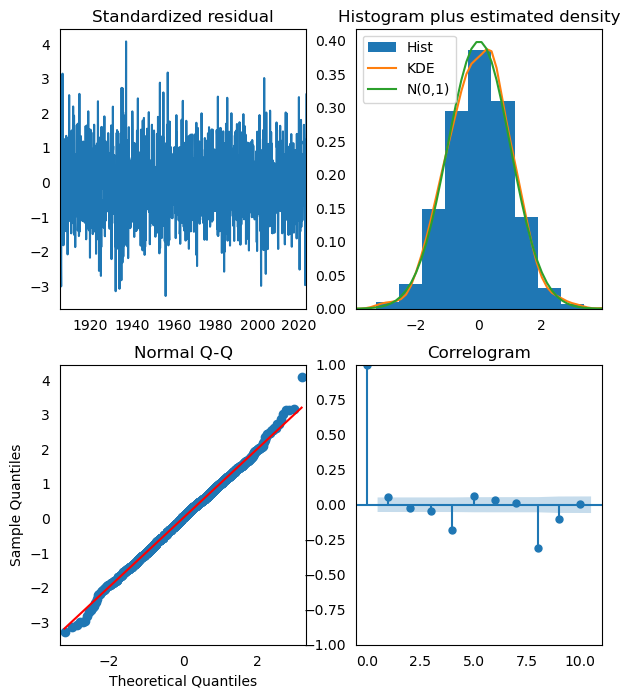

In [50]:
auto_arima_model.plot_diagnostics(figsize=(7,8))
plt.show()

#### Backtesting

C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


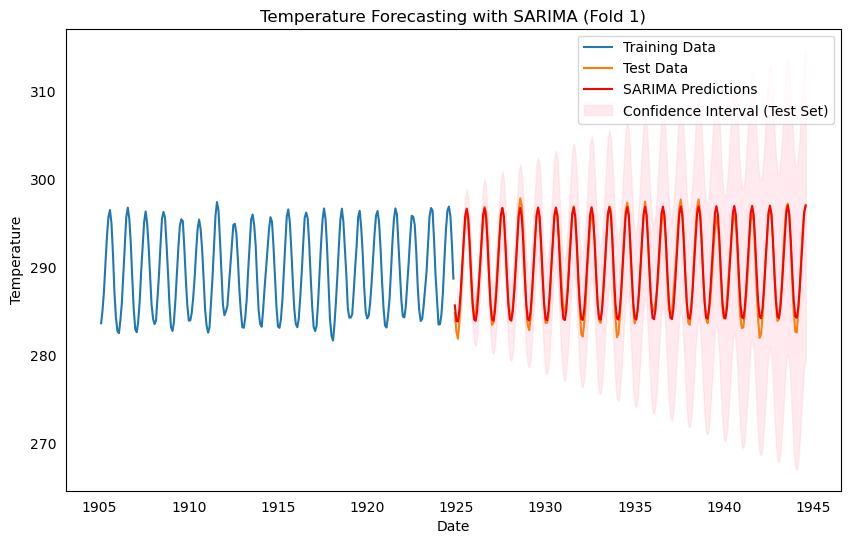

C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


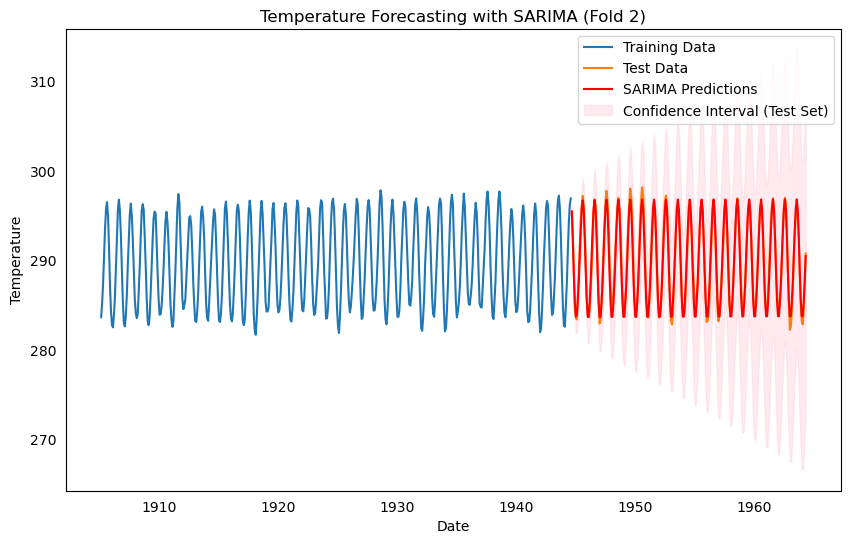

C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


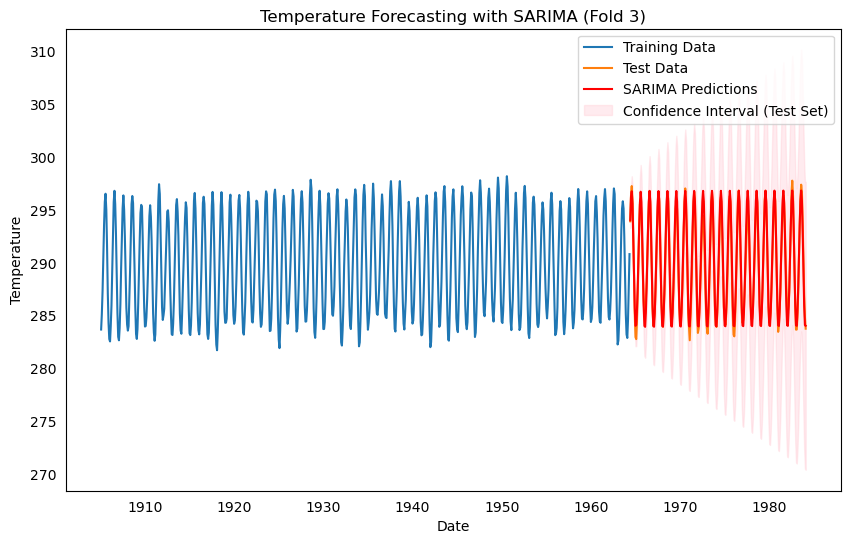

C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


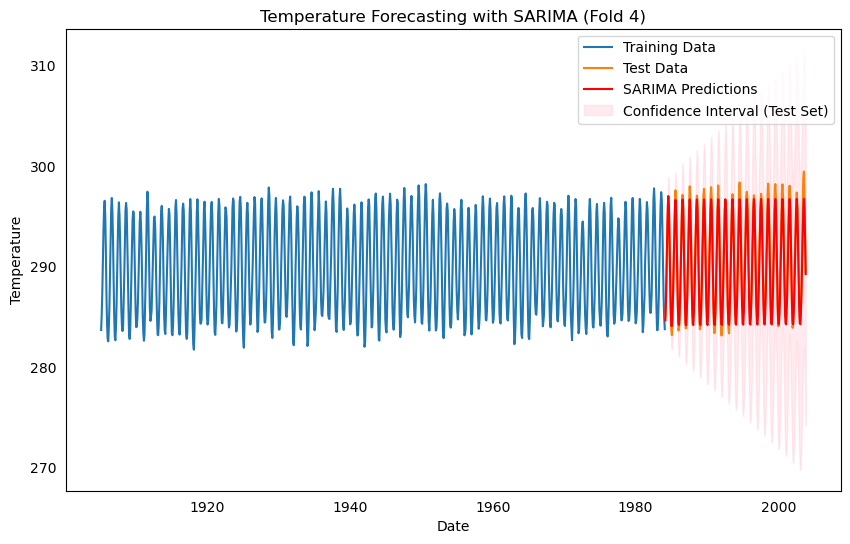

C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\WotanJr\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


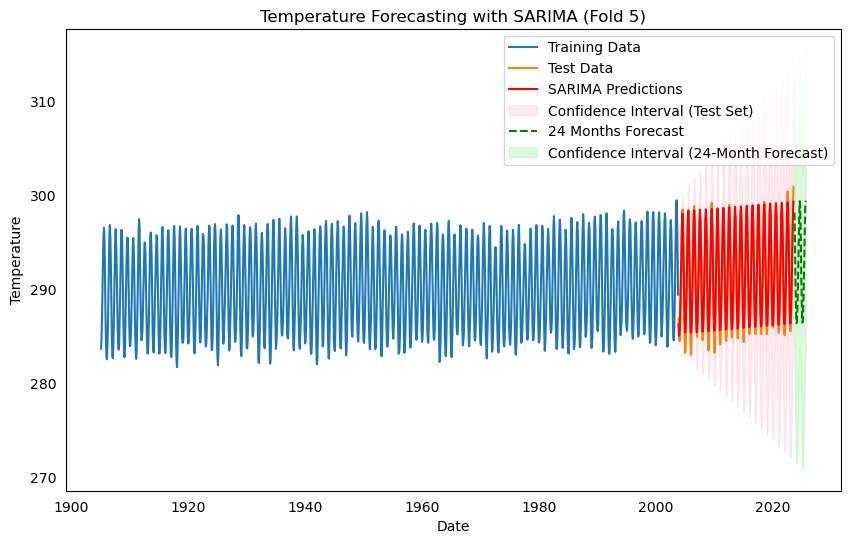

In [51]:

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Initialize lists to store MSE scores for each fold
mse_scores = []

# Perform cross-validation
for fold_index, (train_index, test_index) in enumerate(tscv.split(df_ma_3), 1):
    train_data, test_data = df_ma_3.iloc[train_index], df_ma_3.iloc[test_index]

    # Fit the SARIMA model to the training data
    sarima_model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
    sarima_fit = sarima_model.fit(disp=False)

    # Make predictions on the test data
    predictions = sarima_fit.forecast(len(test_data))

    # Calculate MSE for this fold and store it in the list
    mse_score = mean_squared_error(test_data, predictions)
    mse_scores.append(mse_score)

    # Plot the results for the current fold
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data, label='Training Data')
    plt.plot(test_data.index, test_data, label='Test Data')
    plt.plot(test_data.index, predictions, label='SARIMA Predictions', color='red')

    # Calculate the confidence interval for the predictions on the test set
    forecast_conf_int = sarima_fit.get_forecast(len(test_data)).conf_int()

    # Plot the confidence interval for the test set
    plt.fill_between(test_data.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval (Test Set)')

    if fold_index == tscv.n_splits:    # get the 24 month future prediction only in the last fold.
        # Extend data to include future dates for 24 months prediction
        future_dates = pd.date_range(start=df_ma_3.index[-1], periods=25, freq='M')[1:]  # Start from the next month
        future_data = pd.DataFrame(index=future_dates)   # Create the dataframe, we'll fill it with the predicted data eventually

        # Forecast 24 months into the future. The dates of future_data and future_predictions have to be matched with dateOffset
        future_predictions = sarima_fit.get_prediction(start=(future_dates[0]-pd.DateOffset(months=1)), end=(future_dates[-1]-pd.DateOffset(months=1)))

        # Calculate the confidence interval for the 24-month forecast
        future_conf_int = future_predictions.conf_int()

        # Plot the 24-month forecast
        plt.plot(future_dates, future_predictions.predicted_mean, label='24 Months Forecast', color='green', linestyle='dashed')

        # Plot the confidence interval for the 24-month forecast
        plt.fill_between(future_dates, future_conf_int.iloc[:, 0], future_conf_int.iloc[:, 1], color='lightgreen', alpha=0.3, label='Confidence Interval (24-Month Forecast)')

    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title(f'Temperature Forecasting with SARIMA (Fold {fold_index})')
    plt.legend()
    plt.show()

# Calculate the mean of MSE scores from cross-validation
mean_mse = np.mean(mse_scores)

# save model
sarima_fit.save('SARIMA_model_T.pkl')
# to load model, uncomment the lines below:
# from statsmodels.tsa.arima.model import ARIMAResults
# results_ = ARIMAResults.load('SARIMA_model_T.pkl')


In [52]:
future_predictions.predicted_mean

2023-09-01    298.161520
2023-10-01    295.141253
2023-11-01    291.283888
2023-12-01    288.116097
2024-01-01    286.399899
2024-02-01    286.478512
2024-03-01    287.729778
2024-04-01    289.957462
2024-05-01    292.824314
2024-06-01    295.787931
2024-07-01    298.411930
2024-08-01    299.355726
2024-09-01    298.215545
2024-10-01    295.195919
2024-11-01    291.339372
2024-12-01    288.172254
2025-01-01    286.456420
2025-02-01    286.535017
2025-03-01    287.786017
2025-04-01    290.013228
2025-05-01    292.879472
2025-06-01    295.842459
2025-07-01    298.465902
2025-08-01    299.409498
Freq: MS, Name: predicted_mean, dtype: float64

### Results

In [53]:
print(f'Mean Squared Error (all folds): {round(mean_mse, 2)}')
print(f'Squared Error (across folds): {np.around(mse_scores, 2)}')

Mean Squared Error (all folds): 0.73
Squared Error (across folds): [0.64 0.56 0.58 1.   0.86]


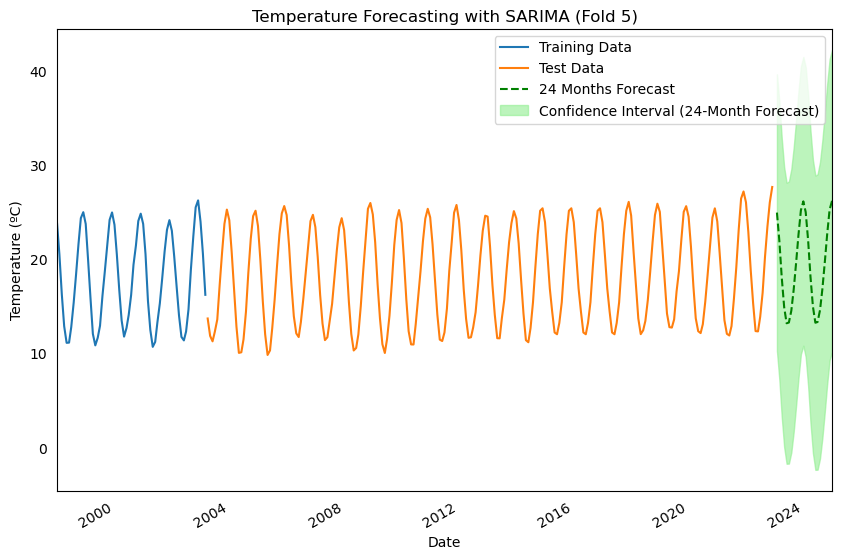

In [54]:
# Plot the detail of a 24 months forecast in last fold
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, (train_data-273.15), label='Training Data')
plt.plot(test_data.index, (test_data-273.15), label='Test Data')

plt.plot(future_dates, (future_predictions.predicted_mean-273.15), label='24 Months Forecast', color='green', linestyle='dashed')
# Plot the confidence interval for the 24-month forecast
plt.fill_between(future_dates, (future_conf_int.iloc[:, 0]-273.15), (future_conf_int.iloc[:, 1]-273.15), color='lightgreen', alpha=0.6, label='Confidence Interval (24-Month Forecast)')

plt.xlabel('Date')
plt.ylabel('Temperature (ºC)')
plt.title(f'Temperature Forecasting with SARIMA (Fold {fold_index})')

plt.xlim(df_ma_3.index[-300], future_dates[-1])
plt.xticks(rotation = 30)

plt.legend()
plt.show()

In [55]:

future_data['TEMP_C'] = np.around(future_predictions.predicted_mean.values-273.15, 2)
future_data['TEMP_K'] = np.around(future_predictions.predicted_mean.values, 2)
future_data['year'] = [d.year for d in future_data.index]
future_data['month_n'] = [d.strftime('%m') for d in future_data.index]

future_data

,TEMP_C,TEMP_K,year,month_n
2023-09-30,25.01,298.16,2023,09
2023-10-31,21.99,295.14,2023,10
2023-11-30,18.13,291.28,2023,11
2023-12-31,14.97,288.12,2023,12
2024-01-31,13.25,286.40,2024,01
2024-02-29,13.33,286.48,2024,02
2024-03-31,14.58,287.73,2024,03
2024-04-30,16.81,289.96,2024,04
2024-05-31,19.67,292.82,2024,05
2024-06-30,22.64,295.79,2024,06


Now let's concatenate the future predictions with the preprocessed historical data (new_df_T)

In [56]:
import pandas as pd
new_df_T = pd.concat([new_df_T, future_data], axis=0)
new_df_T


,TEMP_C,TEMP_K,year,month_n
1905-01-01,8.68,281.83,1905,01
1905-02-01,8.99,282.14,1905,02
1905-03-01,13.92,287.07,1905,03
1905-04-01,16.19,289.34,1905,04
1905-05-01,17.65,290.80,1905,05
...,...,...,...,...
2025-04-30,16.86,290.01,2025,04
2025-05-31,19.73,292.88,2025,05
2025-06-30,22.69,295.84,2025,06
2025-07-31,25.32,298.47,2025,07


In [57]:
new_df_T.year.max()


2025

In [58]:
new_df_T.year.min()

1905

In [59]:
#pip install folium pandas ipywidgets

### Data geolocalization

In [60]:
import folium

# Initialize the map
m = folium.Map(location=[latitude, longitude], zoom_start=500)


In [61]:
import ipywidgets as widgets
from IPython.display import display

# Create sliders for month and year
month_slider = widgets.IntSlider(min=1, max=12, step=1, value=9, description='Month:')
year_slider = widgets.IntSlider(min=new_df_T.year.min(), max=new_df_T.year.max(), step=1, value=2024, description='Year:')

# Display the sliders
display(month_slider, year_slider)


IntSlider(value=9, description='Month:', max=12, min=1)

IntSlider(value=2024, description='Year:', max=2025, min=1905)

In [62]:

def update_map():
    
    month = month_slider.value
    year = year_slider.value
    
    # Clear existing markers
    m = folium.Map(location=[latitude, longitude], zoom_start=10)
    
    # Add a marker for the station's location
    folium.Marker([latitude, longitude], popup=f"Station Location: {latitude}, {longitude}").add_to(m)

    # Filter data for the selected month and year
    filtered_data = new_df_T[(new_df_T.index.month == month) & (new_df_T.index.year == year)]

    # Add markers for temperature data
    for index, row in filtered_data.iterrows():
        temperature = row['TEMP_C']
        #date_t = (str(int(row['month_n']))) + '/' + (str(int(row['year'])))
        date_t = (str(row['month_n'])) + '/' + (str(row['year']))
        folium.Marker([latitude, longitude], 
                      popup=f"Temperature: {temperature}°C",
                      icon=folium.DivIcon(html=f"<div style='font-size: 16px; font-weight: bold;'>{date_t}{' '}{temperature}°C</div>")
                     ).add_to(m)
    
    display(m)

# Attach the function to the sliders
month_slider.observe(update_map, 'value')
year_slider.observe(update_map, 'value')

update_map()

In [63]:
new_df_T.head(10)

,TEMP_C,TEMP_K,year,month_n
1905-01-01,8.68,281.83,1905,01
1905-02-01,8.99,282.14,1905,02
1905-03-01,13.92,287.07,1905,03
1905-04-01,16.19,289.34,1905,04
1905-05-01,17.65,290.80,1905,05
1905-06-01,21.86,295.01,1905,06
1905-07-01,25.99,299.14,1905,07
1905-08-01,24.98,298.13,1905,08
1905-09-01,20.74,293.89,1905,09
1905-10-01,15.80,288.95,1905,10


### Bibliography:

https://data.giss.nasa.gov/gistemp/station_data_v4_globe/

[1] https://www.machinelearningplus.com/time-series/time-series-analysis-python/#google_vignette

[2] https://neptune.ai/blog/time-series-prediction-vs-machine-learning

[3] https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/#google_vignette

[4] https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051

[5] https://towardsai.net/p/l/time-series-forecasting-with-arima-models-in-python-part-2

[6] https://neptune.ai/blog/arima-sarima-real-world-time-series-forecasting-guide
